In [1]:
import tensorflow as tf
# MNIST 데이터 확보
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 데이터의 개수 확인
print("학습 데이터:", mnist.train.num_examples)
print("테스트 데이터:", mnist.test.num_examples)

학습 데이터: 55000
테스트 데이터: 10000


Training Image Size: (784,)
Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
실제 라벨(Not One Hotcoding): 0


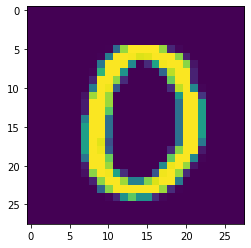

In [3]:
%matplotlib inline
# 데이터 살피기
import matplotlib.pyplot as plt
import numpy as np

# mnist 안쪽의 데이터 확인
#print(help(mnist))
# 학습을 위한 이미지데이터 확인
index = 10
# 학습 이미지 사이즈 확인
print("Training Image Size:", mnist.train.images[index].shape) # 784 = 28 * 28 픽셀의 이미지
# 학습 라벨 데이터 확인
print("Label:", mnist.train.labels[index])
#print("image Data:\n", mnist.train.images[index].reshape(28, 28))
plt.imshow(mnist.train.images[index].reshape(28, 28))
print("실제 라벨(Not One Hotcoding):", np.argmax(mnist.train.labels[index]))
plt.show()

In [4]:
# 신경망 구성 
tf.reset_default_graph()
# 입력층과 출력층 선언
X = tf.placeholder(tf.float32, [None, 784], name="Input") # 28*28 -> 학습데이터의 각 픽셀을 Feature로 삼는다 
Y = tf.placeholder(tf.float32, [None, 10], name="Output") # 최종출력 0 ~ 9, 총 10개의 결과로 분류하기 위한 노드

# 입력층의 784개의 feature -> 첫번째 은닉층 256개로 전달하기 위한 가중치 
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01), name="Weight1")
L1 = tf.nn.relu(tf.matmul(X, W1), name="Activation1") # L1 -> 입력 Feature * 가중치 -> 활성화함수(relu)
# 첫번째 은닉층 256개로부터 두번째 은닉층 256개의 가중치 
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01, name="Weight2"))
L2 = tf.nn.relu(tf.matmul(L1, W2), name="Activation2")
# 두번째 은닉층 256개로부터 출력층 10개의 가중치 (활성화 함수는 생성안함)
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01, name="Weight3"))
# 모델 생성
model = tf.matmul(L2, W3, name="model")

In [5]:
# cross entropy softmax를 이용하여 개별 이미지에 대한 손실값 계산 
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y, name="CrossEntropy")
# 전체 평균 손실값
cost = tf.reduce_mean(cost, name="CostFunction")
# 최적화 수행을 위한 옵티마이저 선택
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# 변수 초기화를 위한 연산자
init = tf.global_variables_initializer()

In [13]:
# 실제 연산의 수행 (Session 이용)
sess = tf.Session()
# Graph Writer 
tf.summary.FileWriter("d:/log_dir/mnist", graph=sess.graph)
# 변수 초기화
sess.run(init)

# 전체 학습 데이터를 나눠서 학습 : Mini Batch
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

# 실제 30회 학습 실행
for epoch in range(30): # 1 epoch : 전체 학습 데이터를 1회 학습
    total_cost = 0
    # 미니 배치 방식으로 전체 데이터를 학습
    for i in range(total_batch):
        # batch_size만큼 나누어서 학습 수행 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={ X:batch_xs, Y:batch_ys})
        total_cost += cost_val # 총 손실값을 인 
        # 전체 데이터를 1회 학습 -> 1 Epoch
    print("Epoch {}회의 평균 Cost:{}".format(epoch+1, total_cost/total_batch))
print("최적화 완료")

# 테스트 데이터를 그대로 입력하여 실제 결과와 평균을 비교 -> 정확도
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
#sess.close()

Epoch 1회의 평균 Cost:1.3991575729846955
Epoch 2회의 평균 Cost:0.36666142925620077
Epoch 3회의 평균 Cost:0.2391733275895769
Epoch 4회의 평균 Cost:0.1724673710831187
Epoch 5회의 평균 Cost:0.13533944500779563
Epoch 6회의 평균 Cost:0.11243526735766367
Epoch 7회의 평균 Cost:0.09498321047899398
Epoch 8회의 평균 Cost:0.08055648320947181
Epoch 9회의 평균 Cost:0.06997480616566132
Epoch 10회의 평균 Cost:0.06112889766439118
Epoch 11회의 평균 Cost:0.054099196014417844
Epoch 12회의 평균 Cost:0.04703569940968671
Epoch 13회의 평균 Cost:0.042217044216496025
Epoch 14회의 평균 Cost:0.0367661287131804
Epoch 15회의 평균 Cost:0.032552198956466535
Epoch 16회의 평균 Cost:0.029173612551636655
Epoch 17회의 평균 Cost:0.025331041163934226
Epoch 18회의 평균 Cost:0.021329031738198615
Epoch 19회의 평균 Cost:0.018810085758185862
Epoch 20회의 평균 Cost:0.016876663350373168
Epoch 21회의 평균 Cost:0.014516333825462921
Epoch 22회의 평균 Cost:0.012854665442031215
Epoch 23회의 평균 Cost:0.011267950906291265
Epoch 24회의 평균 Cost:0.009983945320656693
Epoch 25회의 평균 Cost:0.00883267485991713
Epoch 26회의 평균 Cost:0.00750

In [14]:
print("최종 가중치:", sess.run(W1))
print("최종 가중치 2:", sess.run(W2))
print("최종 가중치 3:", sess.run(W3))

최종 가중치: [[-0.01886924 -0.00043292  0.008035   ... -0.0023424  -0.01758396
   0.00075892]
 [ 0.00163976 -0.01324134 -0.00873544 ... -0.0116557  -0.01114943
  -0.01146721]
 [ 0.00689166 -0.00613737  0.00663552 ...  0.01160388 -0.00012371
  -0.02131127]
 ...
 [ 0.00454033 -0.00717956 -0.00313158 ...  0.03571213  0.00427296
   0.00305915]
 [ 0.00405868 -0.00273472  0.01262459 ...  0.00243644  0.0035649
  -0.00320921]
 [-0.00410749  0.00187666  0.01714718 ...  0.00979359  0.00801146
  -0.00506221]]
최종 가중치 2: [[-9.72712785e-03 -2.31786910e-03 -5.24193747e-03 ...  2.76176678e-03
  -5.31910406e-03  1.16205756e-02]
 [ 4.10910472e-02 -7.88529683e-03 -2.28119548e-02 ... -2.24214401e-02
  -4.64317612e-02 -7.03845592e-03]
 [ 8.78107175e-02  1.98990363e-03 -2.50811316e-03 ... -2.74244826e-02
   3.58407460e-02  8.23788568e-02]
 ...
 [-2.69091614e-02  4.52331873e-03 -6.38239598e-03 ... -1.91424266e-02
  -1.39630036e-02 -2.57297494e-02]
 [-2.49451362e-02  3.46843200e-03 -4.39117989e-03 ...  4.49667312e

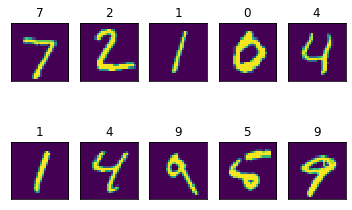

In [19]:
# 총 10개의 test 데이터를 확인해보고(model로)
# test 라벨과 매칭(확인)해 봅시다.
lables = sess.run(model, feed_dict={X:mnist.test.images, Y:mnist.test.labels})

# 2 * 5의 차트 만들기
fig = plt.figure()
for i in range(10): # 0 ~9 번 인덱스까지
    subplot = fig.add_subplot(2, 5, i +1)
    subplot.imshow(mnist.test.images[i].reshape(28, 28))
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("%d" % np.argmax(mnist.test.labels[i]))